# <center> <font color='blue'>Matemática Para Data Science</font> </center>

## Autovetores e Autovalores de Uma Matriz em Python

In [83]:
import sklearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [84]:
# Definindo a matriz A
A = np.array([[4, -2],
              [1,  1]])

In [85]:
# Calculando autovalores e autovetores
autovalores, autovetores = np.linalg.eig(A)

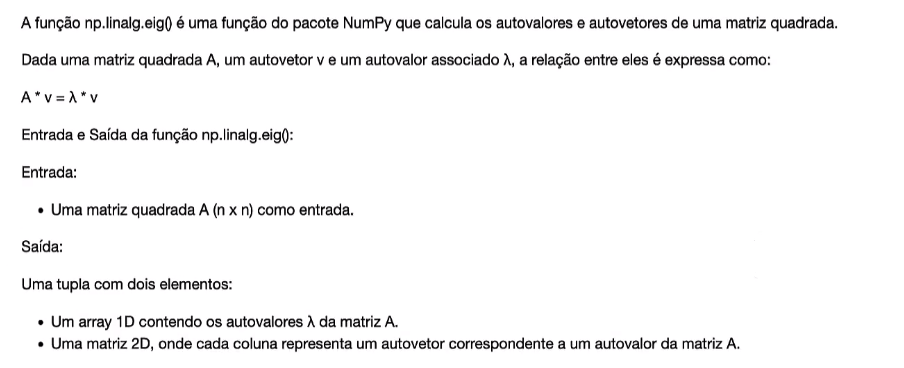

In [86]:
print("Matriz A:")
print(A)
print("\nAutovalores:")
print(autovalores)
print("\nAutovetores:")
print(autovetores)

Matriz A:
[[ 4 -2]
 [ 1  1]]

Autovalores:
[3. 2.]

Autovetores:
[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


## Aplicação Prática de Autovetores e Autovalores com PCA

In [87]:
# Gerando dados bidimensionais correlacionados
np.random.seed(42)
X = np.random.randn(100, 2)
X[:, 1] = 0.8 * X[:, 0] + 0.1 * np.random.randn(100)

In [88]:
# Amostra dos dados
X[1:5]

array([[ 0.64768854,  0.57422928],
       [-0.23415337, -0.07901758],
       [ 1.57921282,  1.36875046],
       [-0.46947439, -0.51334645]])

In [89]:
# Centralizando os dados (subtraindo a média)
X_centered = X - np.mean(X, axis = 0)

In [90]:
# Calculando a matriz de covariância
cov_matrix = np.cov(X_centered.T)

A matriz de covariância, é uma matriz quadrada, que descreve a covariância entre cada par de variáveis em um conjunto de dados. A covariância é uma medida que indica o grau em que duas variáveis variam juntas. Se a covariância for positiva, isso significa que ambas as variáveis tendem a aumentar ou diminuir juntas; se for negativa, uma variável tende a aumentar quando a outra diminui, e vice-versa. Se a covariância for zero, as variáveis são estatisticamente independentes (embora isso não implique necessariamente independência causal).

Para um conjunto de dados com n variáveis, a matriz de covariância é uma matriz n x n, onde o elemento na i-ésima linha e j-ésima coluna é a covariância entre a i-ésima variável e a j-ésima variável. A diagonal principal da matriz de covariância contém as variâncias de cada variável, que são as covariâncias de cada variável consigo mesma.

A matriz de covariância é simétrica, ou seja, a covariância entre a variável i e a variável j é igual à covariância entre a variável j e a variável i. Isso acontece porque a covariância é comutativa: cov(X, Y) = cov(Y, X).

A matriz de covariância é amplamente utilizada em estatística e aprendizado de máquina para analisar a estrutura de correlação entre variáveis em um conjunto de dados. 

PCA usa a matriz de covariância para identificar as direções de maior variância nos dados e projetar os dados nessas direções, reduzindo a dimensionalidade.

In [91]:
# Calculando autovalores e autovetores da matriz de covariância
autovalores, autovetores = np.linalg.eig(cov_matrix)

In [92]:
autovalores

array([1.22907219, 0.00686564])

In [93]:
autovetores

array([[ 0.77093473, -0.63691416],
       [ 0.63691416,  0.77093473]])

In [94]:
# Ordenando autovalores e autovetores por ordem decrescente de autovalores
idx = np.argsort(autovalores)[::-1]
autovalores = autovalores[idx]
autovetores = autovetores[:, idx]

In [95]:
# Projetando os dados nos autovetores (componentes principais)
# "@" Multiplicação
X_pca = X_centered @ autovetores

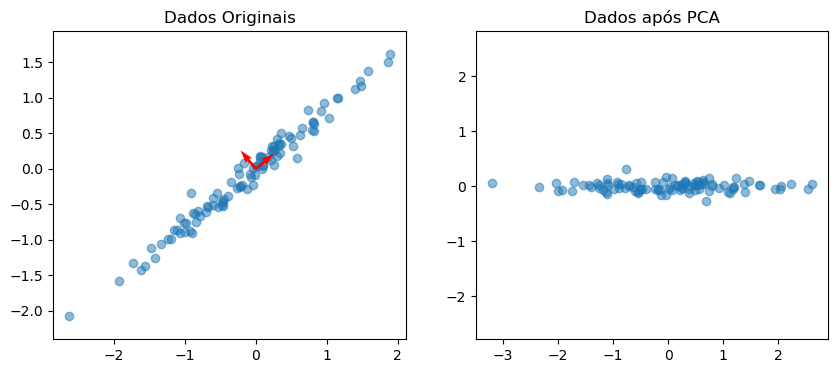

In [96]:
# Visualizando os dados originais e os componentes principais
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(X[:, 0], X[:, 1], alpha=0.5)
axes[0].set_title('Dados Originais')
axes[0].axis('equal')
axes[0].quiver(0, 0, autovetores[0, 0], autovetores[1, 0], color='r', angles='xy', scale_units='xy', scale=3)
axes[0].quiver(0, 0, autovetores[0, 1], autovetores[1, 1], color='r', angles='xy', scale_units='xy', scale=3)

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
axes[1].set_title('Dados após PCA')
axes[1].axis('equal')

plt.show()

## Redução de Dimensionalidade em Machine Learning com PCA

In [97]:
# Gere um conjunto de dados com 200 observações e 5 variáveis
np.random.seed(42)
dados = np.random.randn(200, 5)

In [98]:
dados[1:5]

array([[-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783],
       [-0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272]])

In [99]:
# Padronizando os dados (média 0, desvio padrão 1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dados)

In [100]:
# Aplicando PCA para reduzir a dimensionalidade dos dados
pca = PCA(n_components = 3)
data_pca = pca.fit_transform(data_scaled)

In [101]:
# Exibindo os autovalores e autovetores da matriz de covariância
print("Autovalores:")
print(pca.explained_variance_)
print("\nAutovetores (componentes principais):")
print(pca.components_)

Autovalores:
[1.17508779 1.07187386 1.01839674]

Autovetores (componentes principais):
[[-0.12251671  0.43933549  0.61273362 -0.05886818  0.64270213]
 [ 0.78543169 -0.47225102  0.36436581 -0.11943807  0.11422843]
 [ 0.01514329 -0.03872691  0.27392193  0.94988148 -0.14478554]]


In [102]:
# Exibindo a proporção da variância explicada por cada componente principal
print("Proporção da variância explicada:")
print(pca.explained_variance_ratio_)

Proporção da variância explicada:
[0.23384247 0.2133029  0.20266095]


In [103]:
# Exibindo os dados transformados
print("Dados transformados:")
print(data_pca[1:10])

Dados transformados:
[[ 1.55503708 -0.53199267 -0.44319714]
 [-0.98002519 -0.02928903 -1.6167788 ]
 [-1.02776913  0.08426755 -0.63242381]
 [-0.53028848  1.48774352 -1.33043338]
 [-0.45590295  0.82686992 -0.45436325]
 [ 1.43788876 -1.16260295 -1.29953417]
 [-0.8173191  -1.67846026 -1.97689113]
 [-1.02895966  0.37482946 -0.17354675]
 [-0.58693947 -0.22270587  0.83464082]]
